## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'target'
]

In [3]:
data = pd.read_csv('adult.data', names=column_names, sep=',\s', engine='python')

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [6]:
# Drop unnecessary columns
data = data.drop(['fnlwgt'], axis=1)

In [7]:
# Convert target to binary
data['target'] = data['target'].apply(lambda x: 1 if x == '>50K' else 0)

## Visualization

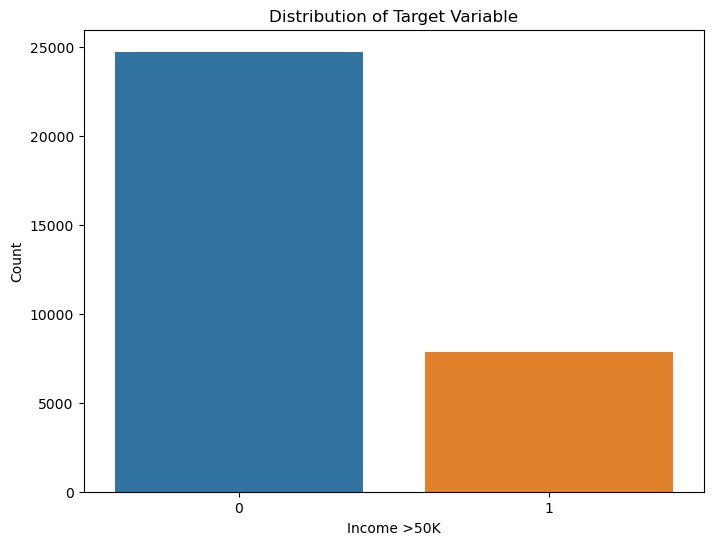

In [8]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Income >50K')
plt.ylabel('Count')
plt.show()

- There are significantly more individuals earning <=50K compared to those earning >50K.

C:\Users\shubh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


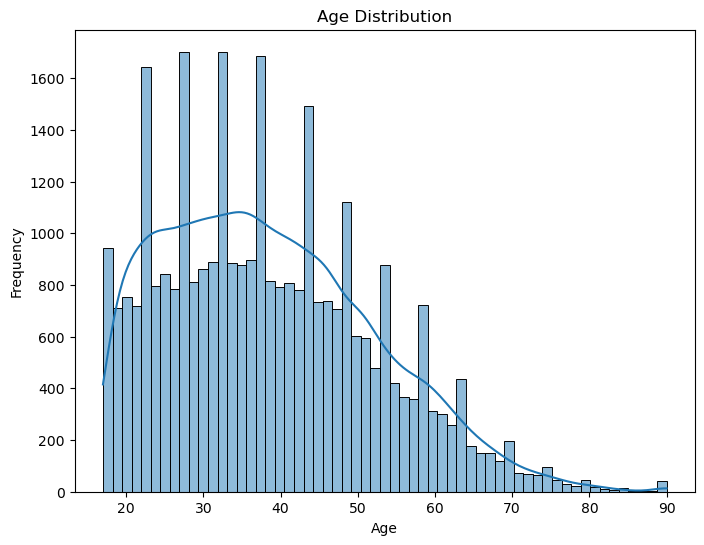

In [9]:
# Visualize the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


- The age distribution is right-skewed, with most individuals between 20 and 50 years old.

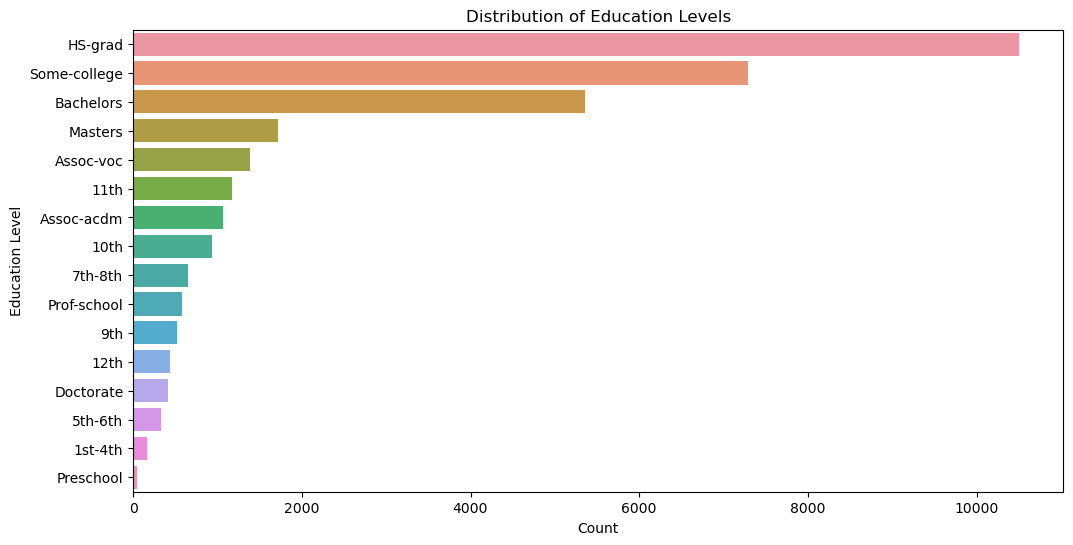

In [10]:
# Visualize the distribution of education levels
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=data, order=data['education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

- The majority of individuals have a high school education or some college education.

C:\Users\shubh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


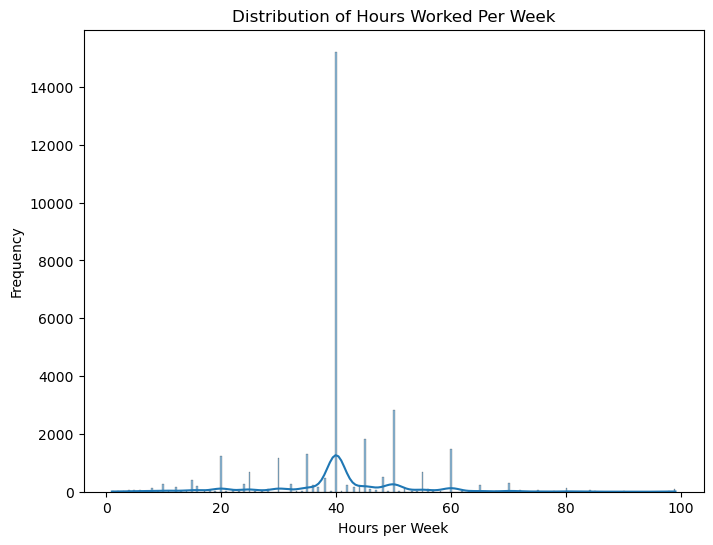

In [11]:
# Visualize the distribution of hours worked per week
plt.figure(figsize=(8, 6))
sns.histplot(data['hours-per-week'], kde=True)
plt.title('Distribution of Hours Worked Per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

- Most individuals work around 40 hours per week, with a smaller peak around 50-60 hours.

## Data Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [13]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,9,13,2,10,5,2,0,0,0,40,5,0


In [14]:
from sklearn.preprocessing import StandardScaler

continuous_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()

data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

In [15]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,0.030671,7,9,1.134739,4,1,1,4,1,0.148453,-0.21666,-0.035429,39,0
1,0.837109,6,9,1.134739,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39,0
2,-0.042642,4,11,-0.420060,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39,0
3,1.057047,4,1,-1.197459,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39,0
4,-0.775768,4,9,1.134739,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,7,0.746039,2,13,5,4,0,-0.145920,-0.21666,-0.197409,39,0
32557,0.103983,4,11,-0.420060,2,7,0,4,1,-0.145920,-0.21666,-0.035429,39,1
32558,1.423610,4,11,-0.420060,6,1,4,4,0,-0.145920,-0.21666,-0.035429,39,0
32559,-1.215643,4,11,-0.420060,4,1,3,4,1,-0.145920,-0.21666,-1.655225,39,0


In [16]:
X = data.drop('target', axis=1)
y = data['target']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Save your data
train_file = 'train_data.csv'
test_file = 'test_data.csv'
pd.concat([X_train, y_train], axis=1).to_csv(train_file, index=False)
pd.concat([X_test, y_test], axis=1).to_csv(test_file, index=False)
